In [1]:
%load_ext autoreload
%autoreload 2

%reload_ext XTIPython

You can now access BridgeLib, ImarisLib, vImaris, vDataSet, vScene and vFactory


In [2]:
%pylab inline

import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


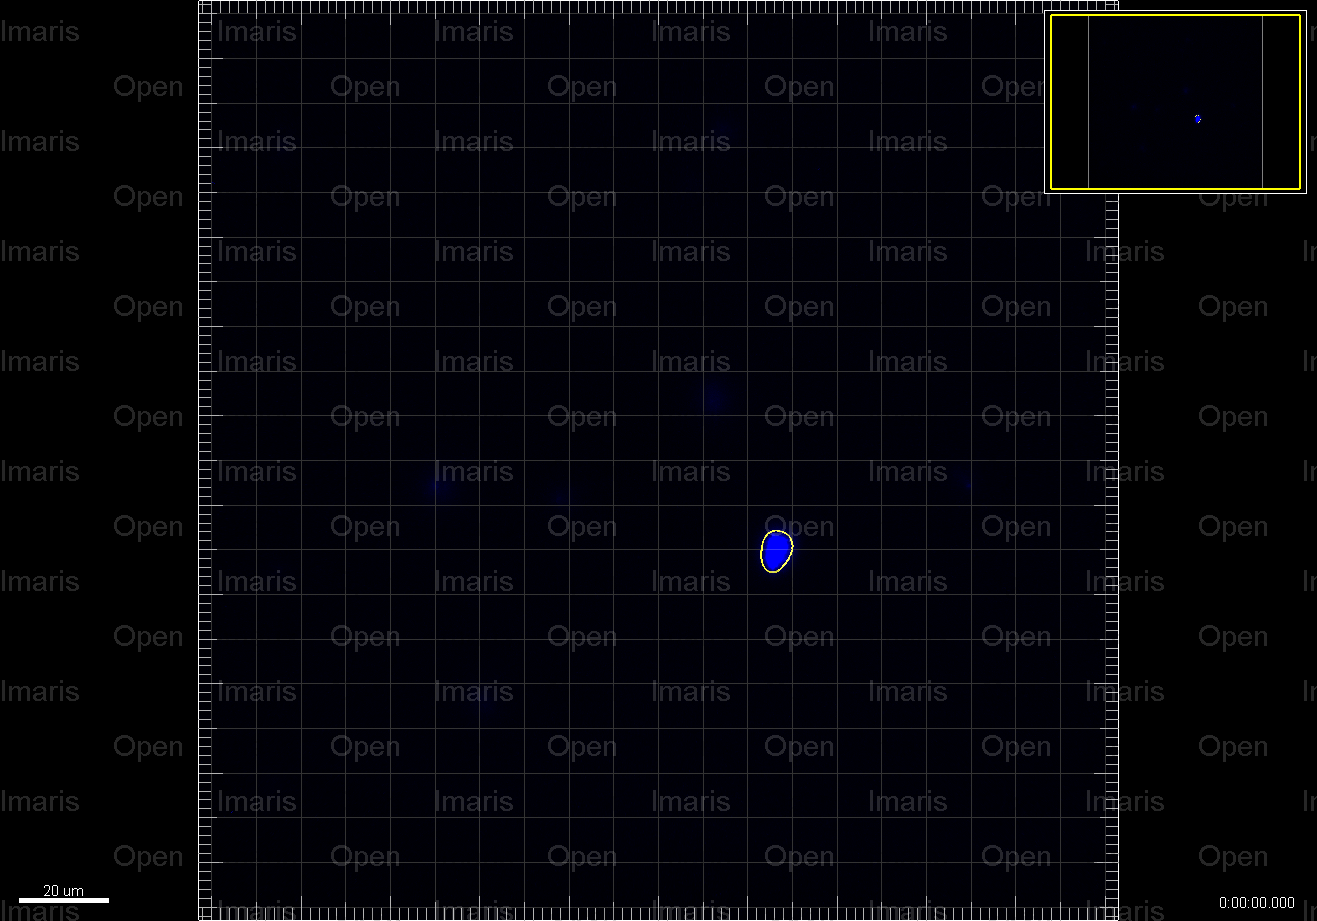

In [3]:
%imaris_screenshot

In [4]:
nx = vDataSet.GetSizeX()
ny = vDataSet.GetSizeY()
nz = vDataSet.GetSizeZ()
nc = vDataSet.GetSizeC()
nt = vDataSet.GetSizeT()

dtype = BridgeLib.GetType(vDataSet)

print nt,nx,ny,nz,nc,dtype

40 2048 2048 1 5 <type 'numpy.uint16'>


In [5]:
x_min = vDataSet.GetExtendMinX()
x_max = vDataSet.GetExtendMaxX()

y_min = vDataSet.GetExtendMinY()
y_max = vDataSet.GetExtendMaxY()

z_min = vDataSet.GetExtendMinZ()
z_max = vDataSet.GetExtendMaxZ()

In [6]:
x_range = x_max-x_min
y_range = y_max-y_min
z_range = z_max-z_min

x_range,y_range,z_range

(205.796875, 205.796875, 1.0)

#### Get channel

In [10]:
t_point = 0
data_in = BridgeLib.GetDataVolume(vDataSet,aIndexC=1,aIndexT=t_point)[0]

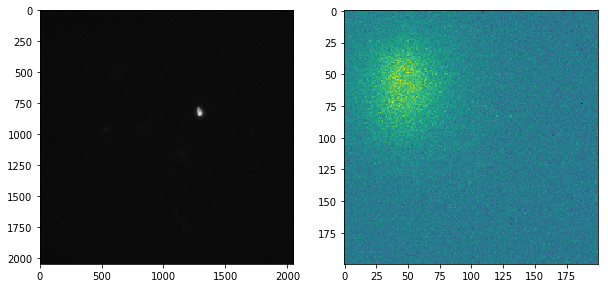

In [11]:
data_cell = data_in[1100:1300,
                    1100:1300]
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(data_in,cmap='gray');

plt.subplot(122)
plt.imshow(data_cell);

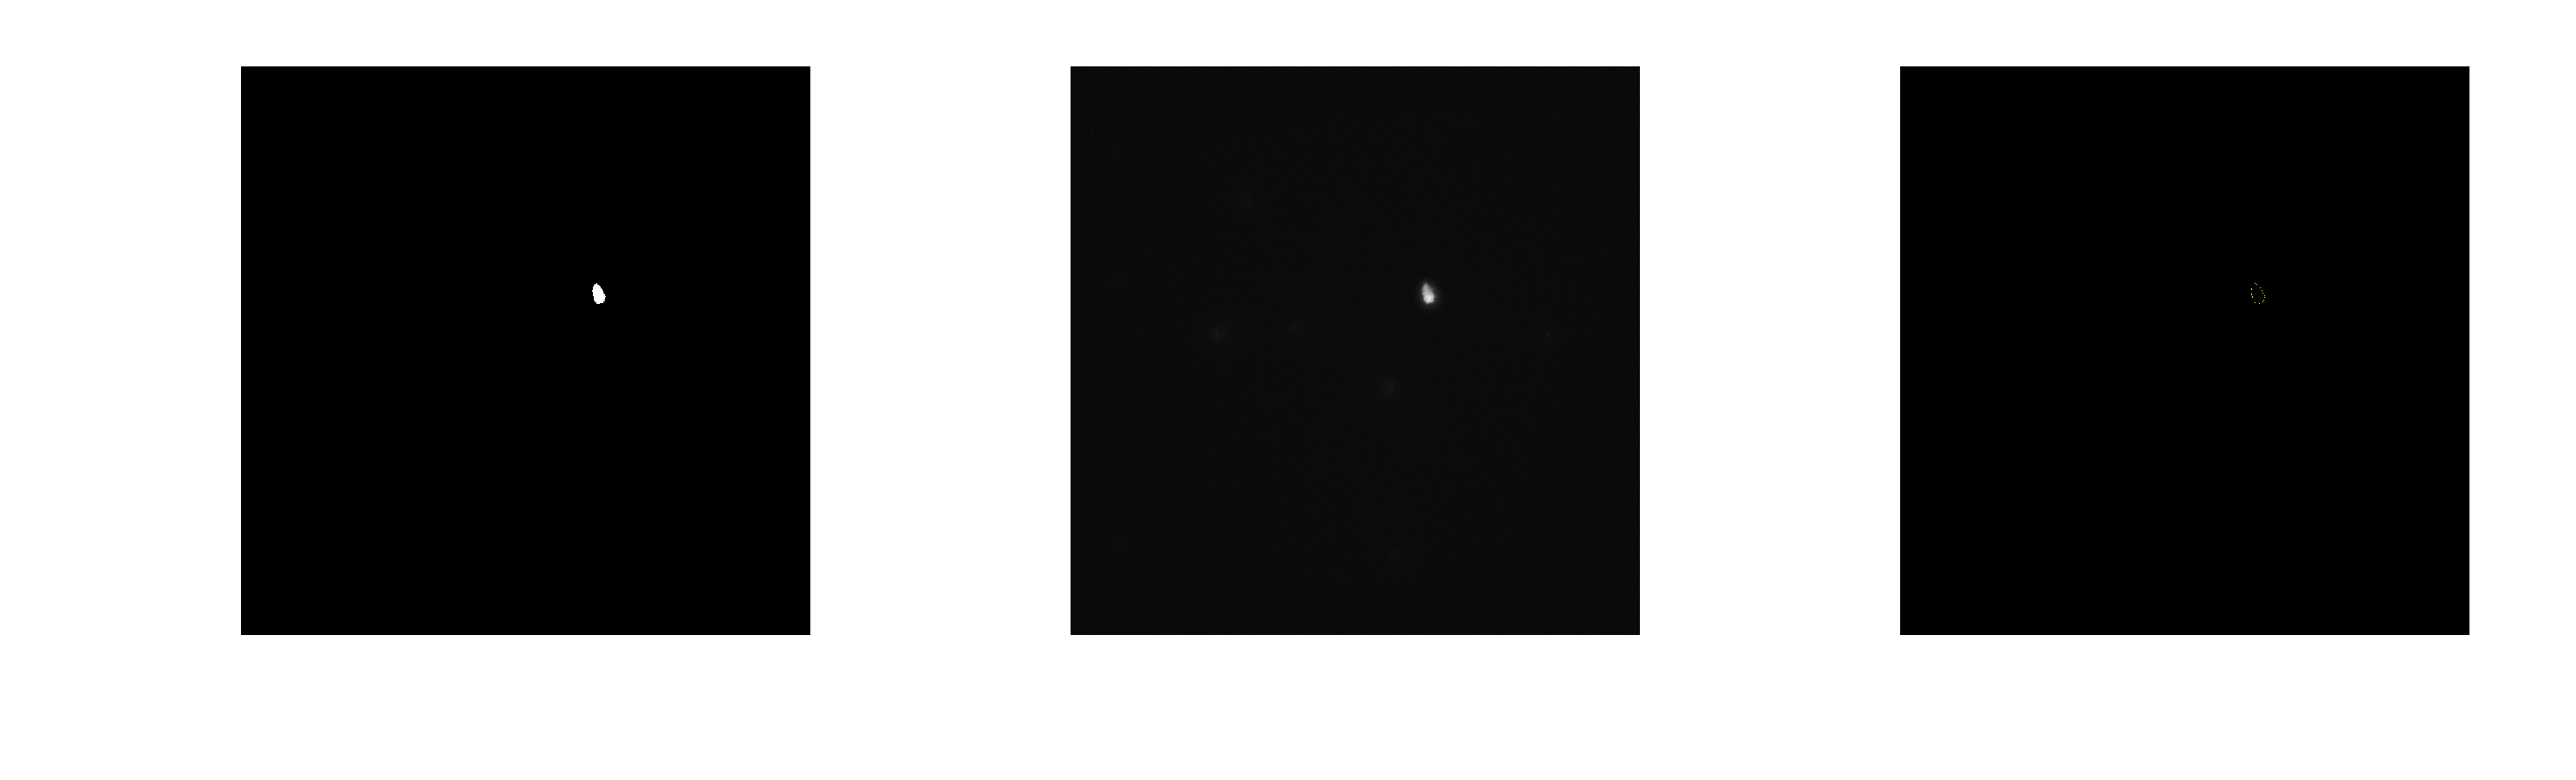

In [12]:
from skimage import segmentation, filters


coins = data_in.copy()
mask = coins > filters.threshold_otsu(coins)

clean_border = segmentation.clear_border(mask).astype(np.int)
coins_edges = segmentation.mark_boundaries(coins, clean_border)

plt.figure(dpi=500)

plt.subplot(131)
plt.imshow(clean_border, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.imshow(coins,cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.imshow(coins_edges)
plt.axis('off')

plt.tight_layout(h_pad=0.01, w_pad=0.01)

In [ ]:
from skimage import segmentation, filters


for t_point in range(0,40):
    
    data_in = BridgeLib.GetDataVolume(vDataSet,aIndexC=2,aIndexT=t_point)[0]
    coins = data_in.copy()
    mask = coins > filters.threshold_otsu(coins)

    clean_border = segmentation.clear_border(mask).astype(np.int)
    coins_edges = segmentation.mark_boundaries(coins, clean_border)

    plt.figure(figsize=(16,5), dpi=500)

    plt.subplot(1,3,1)
    plt.imshow(clean_border, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(coins,cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(coins_edges)
    plt.axis('off')

    plt.tight_layout(h_pad=0.01, w_pad=0.01)
    
    plt.savefig('../plots/'+str(t_point).zfill(3)+'.png')